## Ensure that you have relevant data in data_untracked

In [14]:

import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from path_location import folder_location
from create_features import features
# from create_data import create_features

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

___
## Load data
___

In [3]:
PROCESSED_FOLDER = folder_location.PROCESSED_DATA_FOLDER

## REPLACE THIS WITH TRAINING WHEN IT IS DONE
TRAINING_FEATURES_FILE = folder_location.TRAINING_FULL_FEATURES_FILE
data = pd.read_csv(f'{PROCESSED_FOLDER}/{TRAINING_FEATURES_FILE}')

In [7]:
data

,TRANS_SK,ACCESSION_NUMBER,TRANS_DATE,ISSUERTRADINGSYMBOL,RPTOWNERNAME_;,snorkel_prob,y_pred,ppr_topK_exp,num_topK_neighbors,ppr_house_0.85,ppr_house_0.95,ppr_senate_0.85,ppr_senate_0.95,NODEID,important_connections,full_congress_connections,house_t2_important_connections,house_t2_full_congress_connections,house_t1_important_connections,house_t1_full_congress_connections,sen_important_connections,sen_full_congress_connections,sen_t2_important_connections,sen_t2_full_congress_connections,sen_t1_important_connections,sen_t1_full_congress_connections,full_congress_connections_z,sen_full_congress_connections_z,sen_t2_full_congress_connections_z,house_t2_full_congress_connections_z,sen_important_connections_z,sen_t2_important_connections_z,important_connections_z,house_t2_important_connections_z,full_congress_connections_z_is_low,full_congress_connections_z_is_high,sen_full_congress_connections_z_is_low,sen_full_congress_connections_z_is_high,sen_t2_full_congress_connections_z_is_low,sen_t2_full_congress_connections_z_is_high,house_t2_full_congress_connections_z_is_low,house_t2_full_congress_connections_z_is_high,sen_important_connections_z_is_low,sen_important_connections_z_is_high,sen_t2_important_connections_z_is_low,sen_t2_important_connections_z_is_high,important_connections_z_is_low,important_connections_z_is_high,house_t2_important_connections_z_is_low,house_t2_important_connections_z_is_high,js_bin,s_bin,b_bin,jb_bin,ob_bin,gb_bin,gift,distribution,charity,price,number,ball,pursuant,10b5-1,16b-3,net_trading_intensity,net_trading_amt,relative_trade_size_to_self,beneficial_ownership_score,title_score,filing_lag_days,is_lobby_True,has_lobby_give,has_lobby_give_and_receive,has_lobby_receive,has_donate_give,has_donate_give_and_receive,has_donate_receive,full_congress_connections_z_cat_high,full_congress_connections_z_cat_low,full_congress_connections_z_cat_medium,sen_full_congress_connections_z_cat_high,sen_full_congress_connections_z_cat_low,sen_full_congress_connections_z_cat_medium,sen_t2_full_congress_connections_z_cat_high,sen_t2_full_congress_connections_z_cat_low,sen_t2_full_congress_connections_z_cat_medium,house_t2_full_congress_connections_z_cat_high,house_t2_full_congress_connections_z_cat_low,house_t2_full_congress_connections_z_cat_medium,sen_important_connections_z_cat_high,sen_important_connections_z_cat_low,sen_important_connections_z_cat_medium,sen_t2_important_connections_z_cat_high,sen_t2_important_connections_z_cat_low,sen_t2_important_connections_z_cat_medium,important_connections_z_cat_high,important_connections_z_cat_low,important_connections_z_cat_medium,house_t2_important_connections_z_cat_high,house_t2_important_connections_z_cat_low,house_t2_important_connections_z_cat_medium,TRANS_TIMELINESS_clean_early,TRANS_TIMELINESS_clean_late,TRANS_TIMELINESS_clean_on_time,execution_timeliness_after_trans,execution_timeliness_before_trans,execution_timeliness_on_trans,filing_timeliness_early_filing,filing_timeliness_late_filing,filing_timeliness_on_time_filing
0,3794004,0001181431-09-023155,2009-05-04,EXAC,BINCH JAMES G,1.000000,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,249380.0,89,333,169,430,0,1,28,21,23,18,0,0,0.876972,1.034541,10.110444,10.861257,0.858930,0.636379,0.276601,4.883349,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.000000,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
1,2834113,0001181431-12-005367,2012-01-31,EXAC,BINCH JAMES G,1.000000,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,249380.0,95,332,160,423,0,0,88,97,89,98,0,0,0.404706,0.808893,5.176332,7.904903,1.455074,3.301745,0.850979,3.931007,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,2.061856,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
2,3043733,0001181431-12-047732,2012-08-03,EXAC,BINCH JAMES G,

### Removing non features

In [8]:
to_drop = ['TRANS_SK', 'ACCESSION_NUMBER',  'RPTOWNERNAME_;', 'snorkel_prob', 'TRANS_DATE', 'ISSUERTRADINGSYMBOL']
labels = ["y_pred"]
label_data = data[labels]
features_train = data.drop(columns=labels + to_drop)

In [80]:
label_data.head()

,y_pred
0,1
1,1
2,0
3,0
4,0


In [ ]:
features_train.head()

,ppr_topK_exp,num_topK_neighbors,ppr_house_0.85,ppr_house_0.95,ppr_senate_0.85,ppr_senate_0.95,NODEID,important_connections,full_congress_connections,house_t2_important_connections,house_t2_full_congress_connections,house_t1_important_connections,house_t1_full_congress_connections,sen_important_connections,sen_full_congress_connections,sen_t2_important_connections,sen_t2_full_congress_connections,sen_t1_important_connections,sen_t1_full_congress_connections,full_congress_connections_z,sen_full_congress_connections_z,sen_t2_full_congress_connections_z,house_t2_full_congress_connections_z,sen_important_connections_z,sen_t2_important_connections_z,important_connections_z,house_t2_important_connections_z,full_congress_connections_z_is_low,full_congress_connections_z_is_high,sen_full_congress_connections_z_is_low,sen_full_congress_connections_z_is_high,sen_t2_full_congress_connections_z_is_low,sen_t2_full_congress_connections_z_is_high,house_t2_full_congress_connections_z_is_low,house_t2_full_congress_connections_z_is_high,sen_important_connections_z_is_low,sen_important_connections_z_is_high,sen_t2_important_connections_z_is_low,sen_t2_important_connections_z_is_high,important_connections_z_is_low,important_connections_z_is_high,house_t2_important_connections_z_is_low,house_t2_important_connections_z_is_high,js_bin,s_bin,b_bin,jb_bin,ob_bin,gb_bin,gift,distribution,charity,price,number,ball,pursuant,10b5-1,16b-3,net_trading_intensity,net_trading_amt,relative_trade_size_to_self,beneficial_ownership_score,title_score,filing_lag_days,is_lobby_True,has_lobby_give,has_lobby_give_and_receive,has_lobby_receive,has_donate_give,has_donate_give_and_receive,has_donate_receive,full_congress_connections_z_cat_high,full_congress_connections_z_cat_low,full_congress_connections_z_cat_medium,sen_full_congress_connections_z_cat_high,sen_full_congress_connections_z_cat_low,sen_full_congress_connections_z_cat_medium,sen_t2_full_congress_connections_z_cat_high,sen_t2_full_congress_connections_z_cat_low,sen_t2_full_congress_connections_z_cat_medium,house_t2_full_congress_connections_z_cat_high,house_t2_full_congress_connections_z_cat_low,house_t2_full_congress_connections_z_cat_medium,sen_important_connections_z_cat_high,sen_important_connections_z_cat_low,sen_important_connections_z_cat_medium,sen_t2_important_connections_z_cat_high,sen_t2_important_connections_z_cat_low,sen_t2_important_connections_z_cat_medium,important_connections_z_cat_high,important_connections_z_cat_low,important_connections_z_cat_medium,house_t2_important_connections_z_cat_high,house_t2_important_connections_z_cat_low,house_t2_important_connections_z_cat_medium,TRANS_TIMELINESS_clean_early,TRANS_TIMELINESS_clean_late,TRANS_TIMELINESS_clean_on_time,execution_timeliness_after_trans,execution_timeliness_before_trans,execution_timeliness_on_trans,filing_timeliness_early_filing,filing_timeliness_late_filing,filing_timeliness_on_time_filing
0,0.0,0.0,0.0,0.0,0.0,0.0,249380.0,89,333,169,430,0,1,28,21,23,18,0,0,0.876972,1.034541,10.110444,10.861257,0.858930,0.636379,0.276601,4.883349,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.000000,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,249380.0,95,332,160,423,0,0,88,97,89,98,0,0,0.404706,0.808893,5.176332,7.904903,1.455074,3.301745,0.850979,3.931007,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,2.061856,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,249380.0,95,326,160,423,0,0,88,97,89,98,0,0,0.342856,0.742962,6.120190,7.866274,1.103764,4.298150,0.388136,4.986063,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.959596,0,0,25,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0

In [9]:
Xtr_sub = features_train
ytr = label_data

In [ ]:
def get_corr_graph(X):
    corr = X.corr(method="pearson")
    if X.shape[1] < 15:
        plt.figure(figsize=(10, 10))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    else:
        plt.figure(figsize=(20, 20))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
    plt.title("Feature-Label Correlation Heatmap")
    plt.show()

### Inspect correlation graph between features

### Transaction code feature

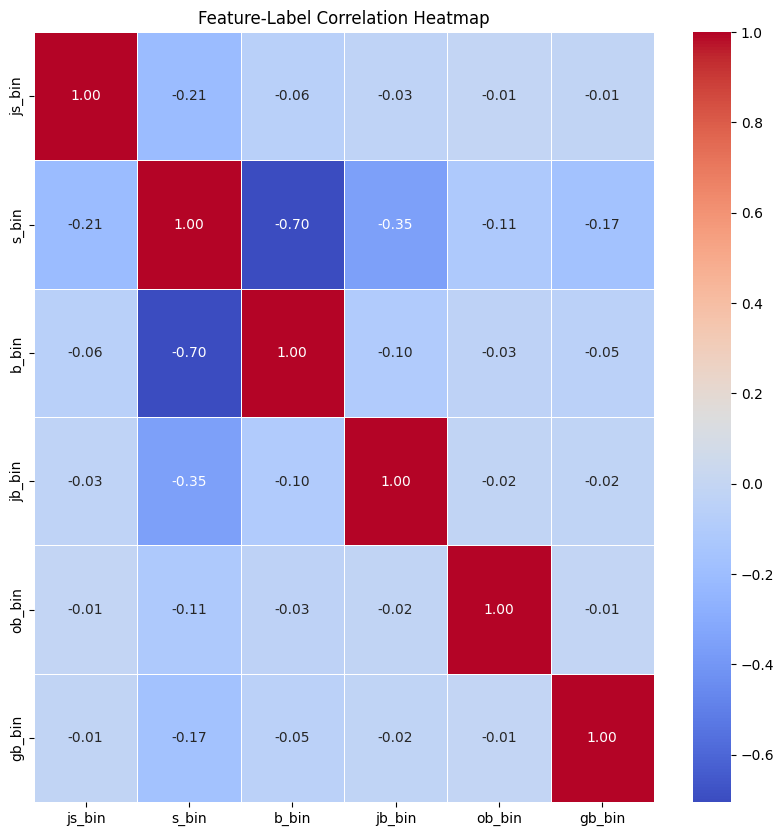

In [45]:
trans_code = features.TRANSACTION_CODE_FEATURE
get_corr_graph(Xtr_sub[trans_code])

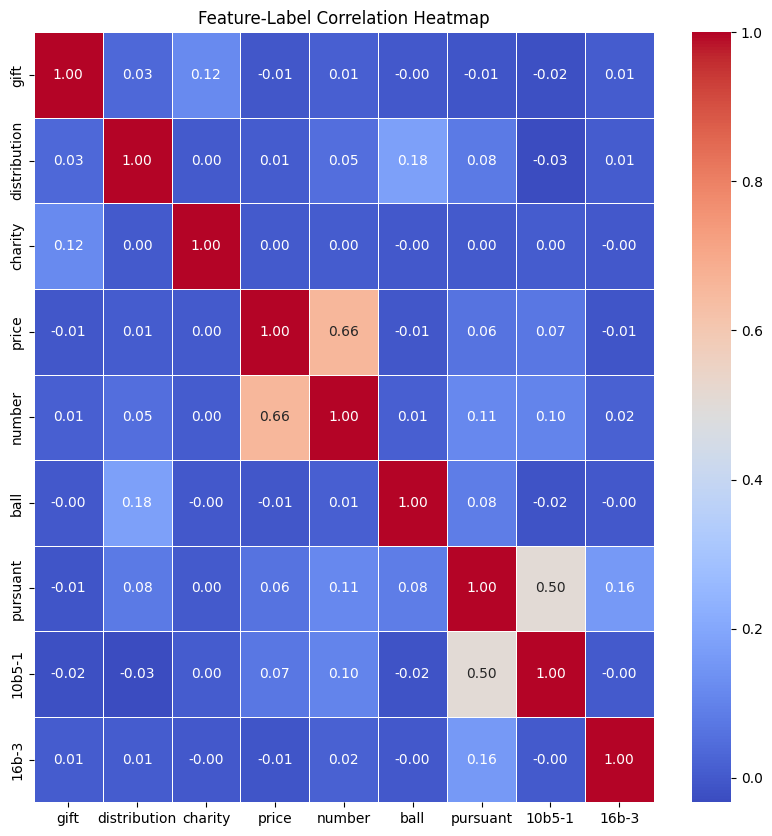

In [50]:
footnotes = ['gift', 'distribution', 'charity', 'price', 'number', 'ball', 'pursuant', '10b5-1', '16b-3']
get_corr_graph(Xtr_sub[footnotes])

In [28]:
Xtr_sub.drop(columns=trans_code)

,ppr_topK_exp,num_topK_neighbors,ppr_house_0.85,ppr_house_0.95,ppr_senate_0.85,ppr_senate_0.95,NODEID,important_connections,full_congress_connections,house_t2_important_connections,house_t2_full_congress_connections,house_t1_important_connections,house_t1_full_congress_connections,sen_important_connections,sen_full_congress_connections,sen_t2_important_connections,sen_t2_full_congress_connections,sen_t1_important_connections,sen_t1_full_congress_connections,full_congress_connections_z,sen_full_congress_connections_z,sen_t2_full_congress_connections_z,house_t2_full_congress_connections_z,sen_important_connections_z,sen_t2_important_connections_z,important_connections_z,house_t2_important_connections_z,full_congress_connections_z_is_low,full_congress_connections_z_is_high,sen_full_congress_connections_z_is_low,sen_full_congress_connections_z_is_high,sen_t2_full_congress_connections_z_is_low,sen_t2_full_congress_connections_z_is_high,house_t2_full_congress_connections_z_is_low,house_t2_full_congress_connections_z_is_high,sen_important_connections_z_is_low,sen_important_connections_z_is_high,sen_t2_important_connections_z_is_low,sen_t2_important_connections_z_is_high,important_connections_z_is_low,important_connections_z_is_high,house_t2_important_connections_z_is_low,house_t2_important_connections_z_is_high,gift,distribution,charity,price,number,ball,pursuant,10b5-1,16b-3,net_trading_intensity,net_trading_amt,relative_trade_size_to_self,beneficial_ownership_score,title_score,filing_lag_days,is_lobby_True,has_lobby_give,has_lobby_give_and_receive,has_lobby_receive,has_donate_give,has_donate_give_and_receive,has_donate_receive,full_congress_connections_z_cat_high,full_congress_connections_z_cat_low,full_congress_connections_z_cat_medium,sen_full_congress_connections_z_cat_high,sen_full_congress_connections_z_cat_low,sen_full_congress_connections_z_cat_medium,sen_t2_full_congress_connections_z_cat_high,sen_t2_full_congress_connections_z_cat_low,sen_t2_full_congress_connections_z_cat_medium,house_t2_full_congress_connections_z_cat_high,house_t2_full_congress_connections_z_cat_low,house_t2_full_congress_connections_z_cat_medium,sen_important_connections_z_cat_high,sen_important_connections_z_cat_low,sen_important_connections_z_cat_medium,sen_t2_important_connections_z_cat_high,sen_t2_important_connections_z_cat_low,sen_t2_important_connections_z_cat_medium,important_connections_z_cat_high,important_connections_z_cat_low,important_connections_z_cat_medium,house_t2_important_connections_z_cat_high,house_t2_important_connections_z_cat_low,house_t2_important_connections_z_cat_medium,TRANS_TIMELINESS_clean_early,TRANS_TIMELINESS_clean_late,TRANS_TIMELINESS_clean_on_time,execution_timeliness_after_trans,execution_timeliness_before_trans,execution_timeliness_on_trans,filing_timeliness_early_filing,filing_timeliness_late_filing,filing_timeliness_on_time_filing
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,249380.0,89,333,169,430,0,1,28,21,23,18,0,0,0.876972,1.034541,10.110444,10.861257,0.858930,0.636379,0.276601,4.883349,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.000000,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,249380.0,95,332,160,423,0,0,88,97,89,98,0,0,0.404706,0.808893,5.176332,7.904903,1.455074,3.301745,0.850979,3.931007,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,2.061856,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,249380.0,95,326,160,423,0,0,88,97,89,98,0,0,0.342856,0.742962,6.120190,7.866274,1.103764,4.298150,0.388136,4.986063,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.959596,0,0,25,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,

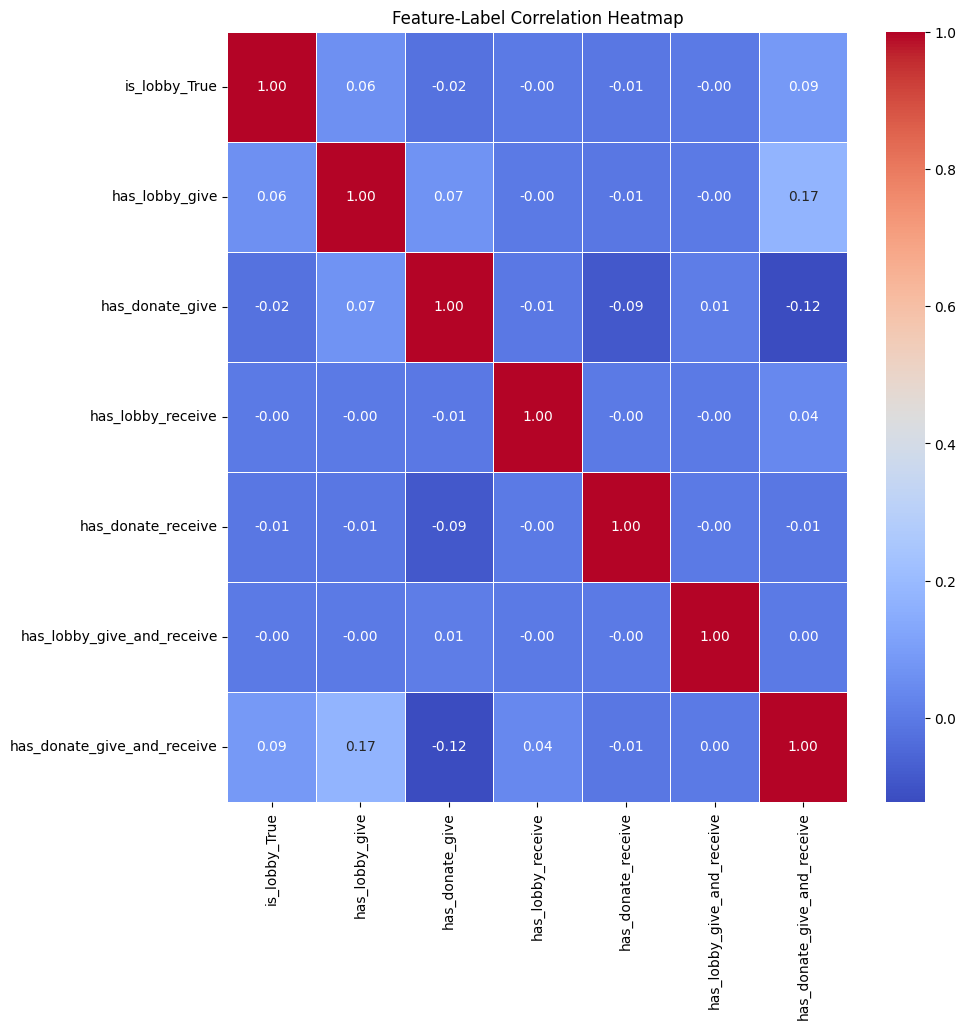

In [46]:
network = ['is_lobby_True', 'has_lobby_give', 'has_donate_give', 'has_lobby_receive', 'has_donate_receive', 'has_lobby_give_and_receive', 'has_donate_give_and_receive']
get_corr_graph(Xtr_sub[network])

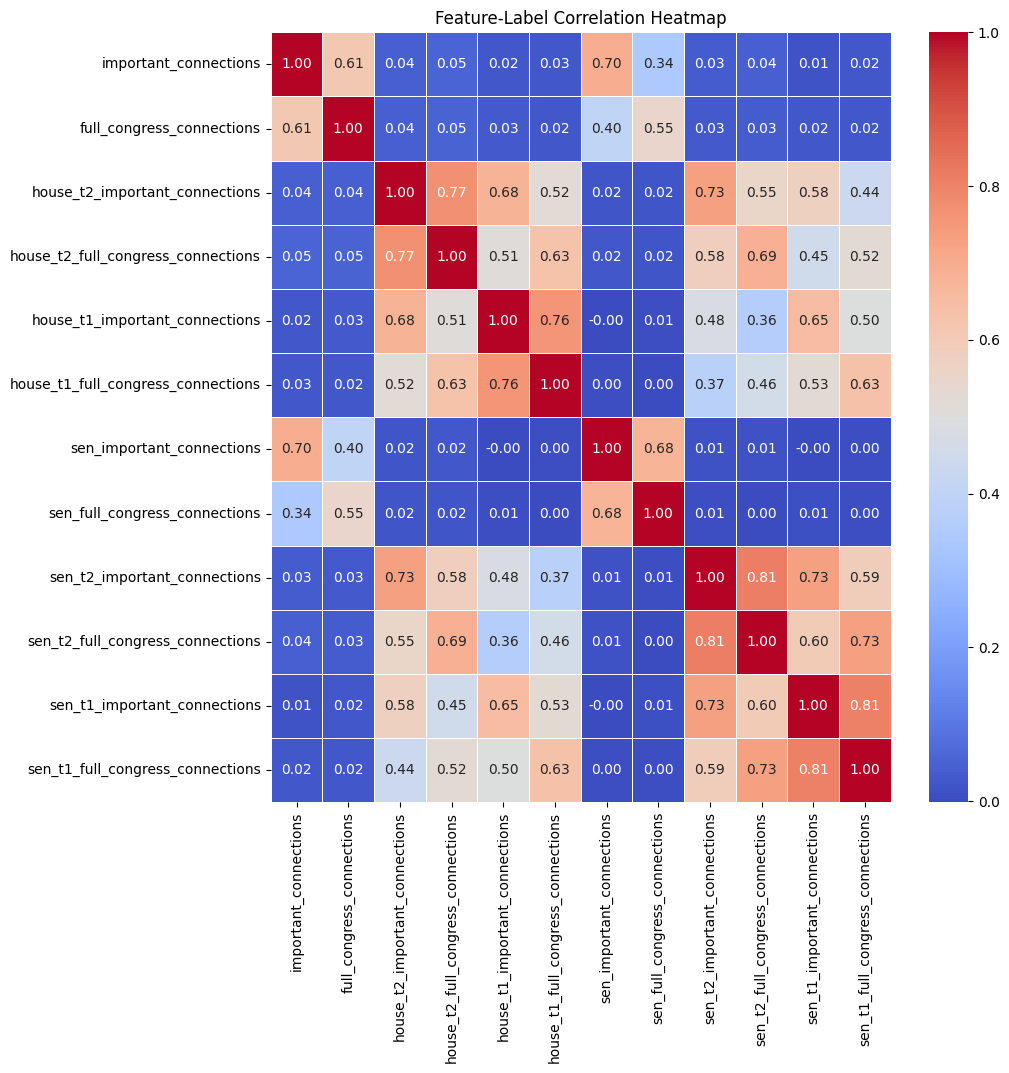

In [47]:
network_dep = ['important_connections',
 'full_congress_connections',
 'house_t2_important_connections',
 'house_t2_full_congress_connections',
 'house_t1_important_connections',
 'house_t1_full_congress_connections',
 'sen_important_connections',
 'sen_full_congress_connections',
 'sen_t2_important_connections',
 'sen_t2_full_congress_connections',
 'sen_t1_important_connections',
 'sen_t1_full_congress_connections']

get_corr_graph(Xtr_sub[network_dep])

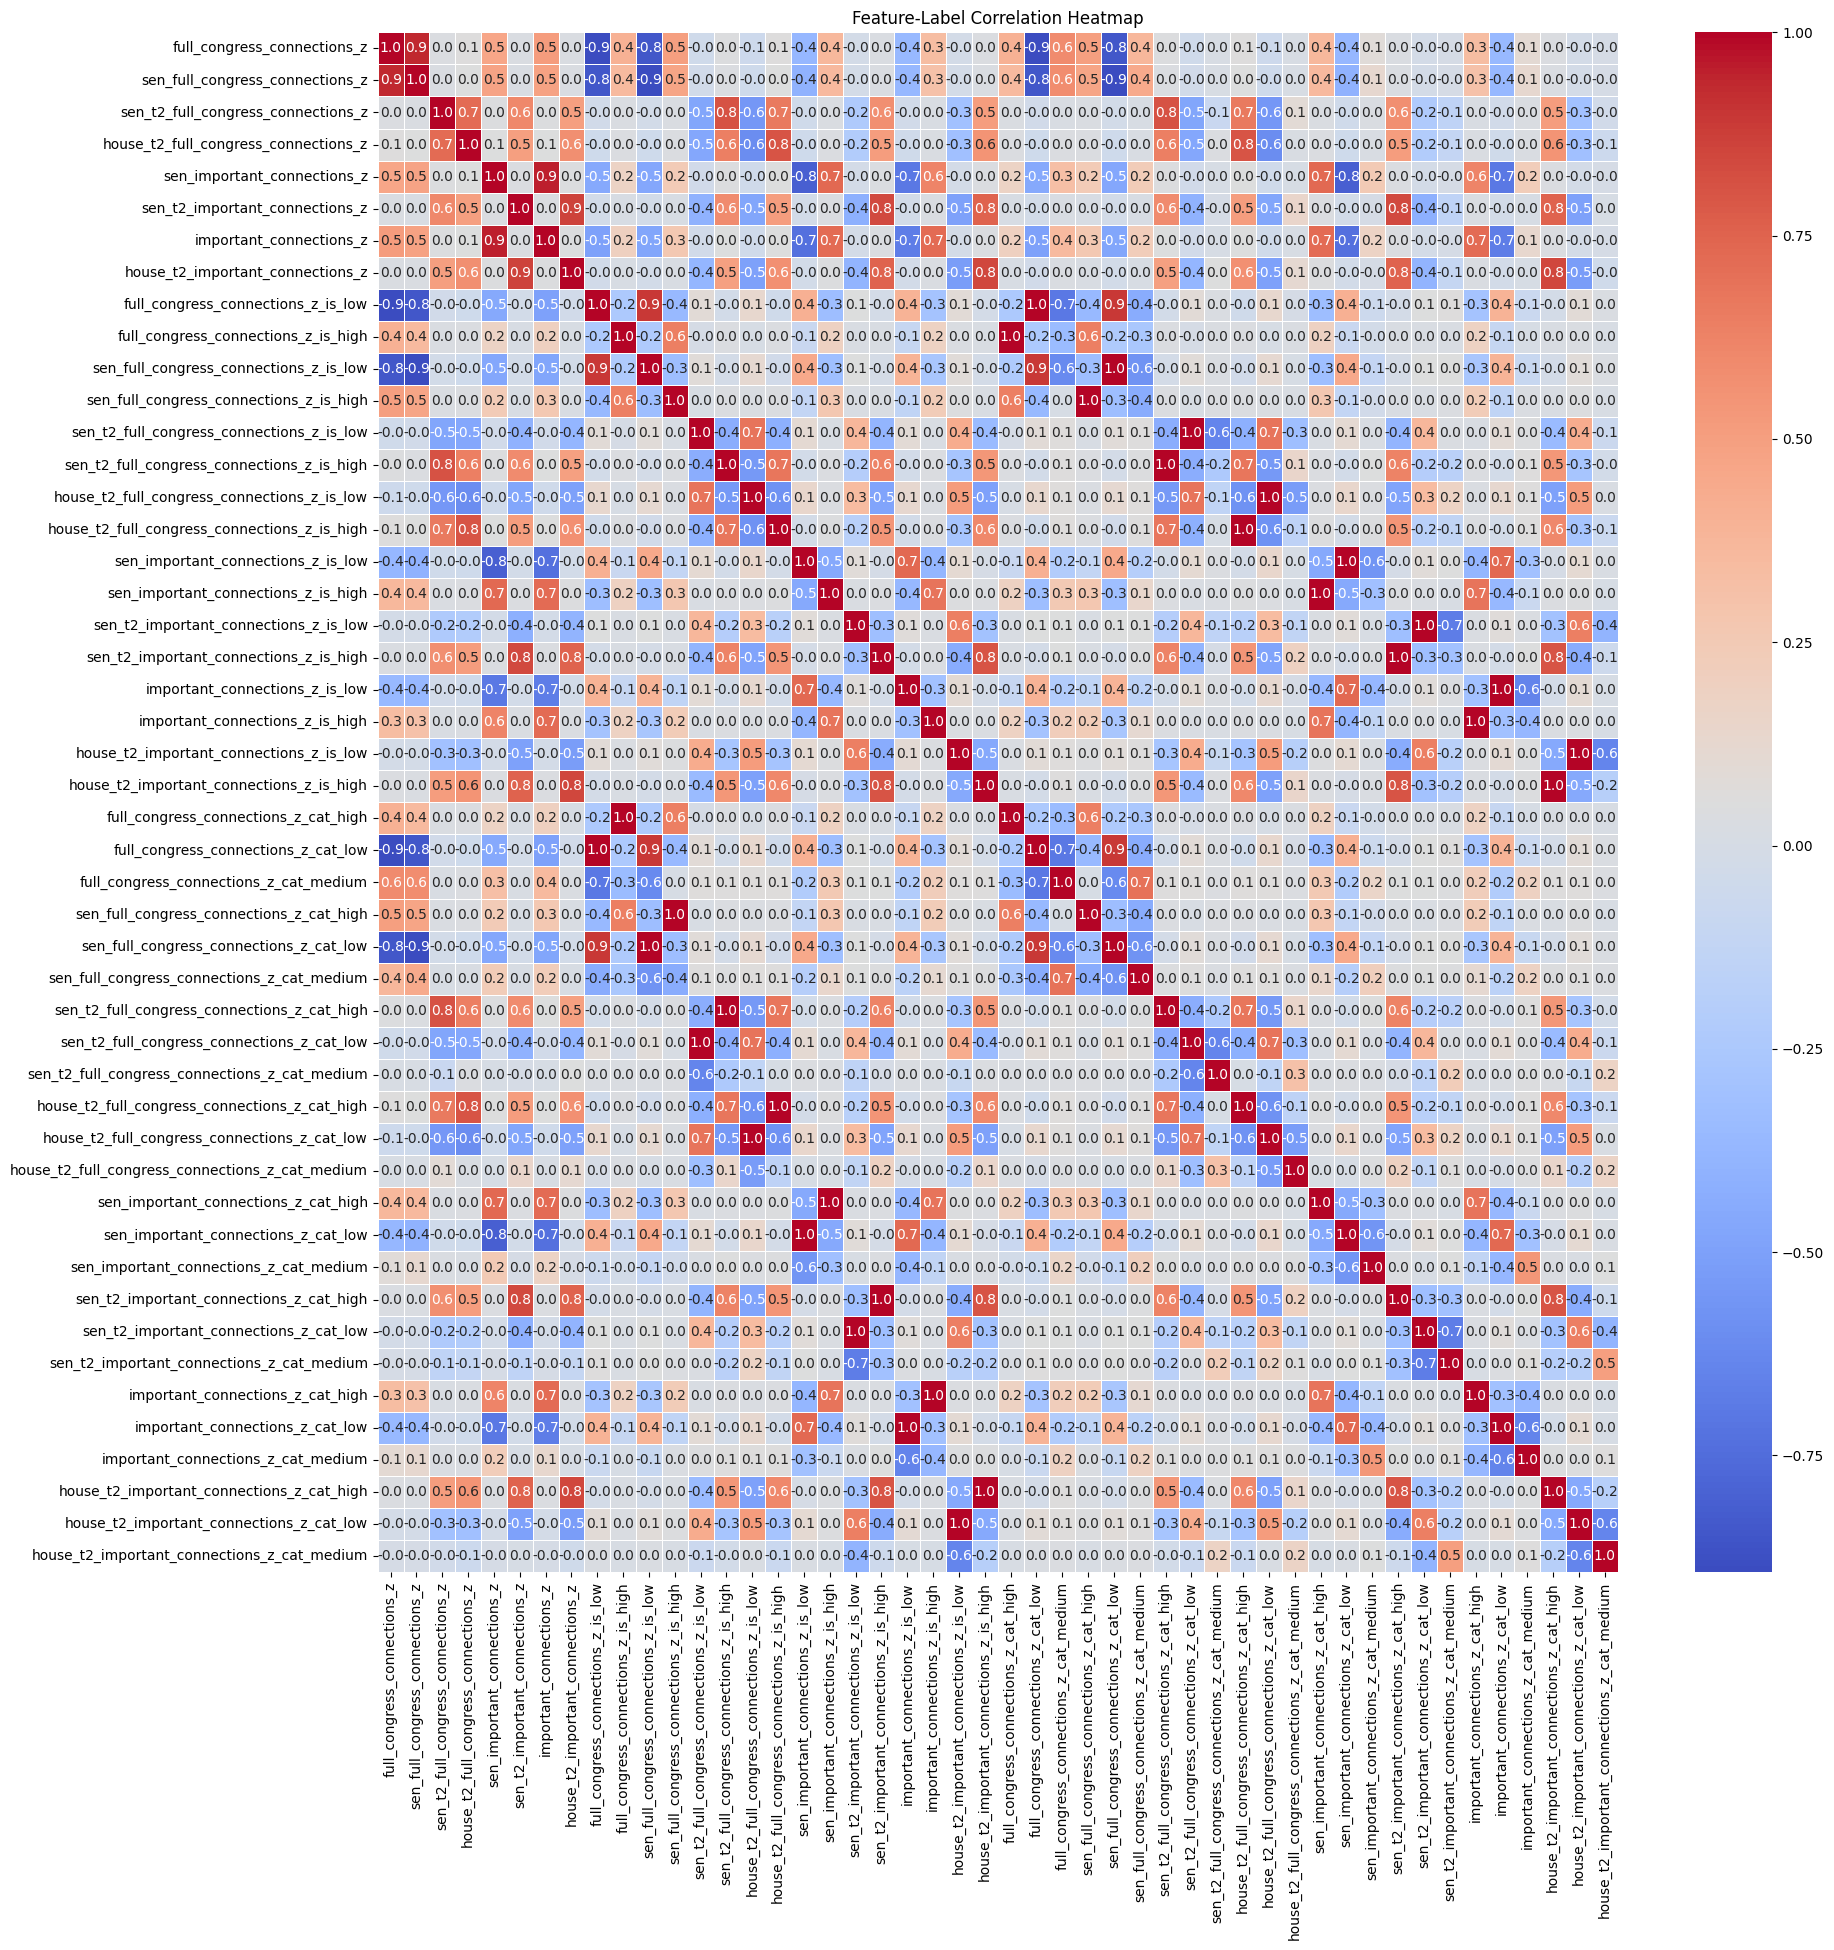

In [48]:
network_zscore = ['full_congress_connections_z', 'sen_full_congress_connections_z',
       'sen_t2_full_congress_connections_z',
       'house_t2_full_congress_connections_z', 'sen_important_connections_z',
       'sen_t2_important_connections_z', 'important_connections_z',
       'house_t2_important_connections_z',
       'full_congress_connections_z_is_low',
       'full_congress_connections_z_is_high',
       'sen_full_congress_connections_z_is_low',
       'sen_full_congress_connections_z_is_high',
       'sen_t2_full_congress_connections_z_is_low',
       'sen_t2_full_congress_connections_z_is_high',
       'house_t2_full_congress_connections_z_is_low',
       'house_t2_full_congress_connections_z_is_high',
       'sen_important_connections_z_is_low',
       'sen_important_connections_z_is_high',
       'sen_t2_important_connections_z_is_low',
       'sen_t2_important_connections_z_is_high',
       'important_connections_z_is_low', 'important_connections_z_is_high',
       'house_t2_important_connections_z_is_low',
       'house_t2_important_connections_z_is_high',
       'full_congress_connections_z_cat_high',
       'full_congress_connections_z_cat_low',
       'full_congress_connections_z_cat_medium',
       'sen_full_congress_connections_z_cat_high',
       'sen_full_congress_connections_z_cat_low',
       'sen_full_congress_connections_z_cat_medium',
       'sen_t2_full_congress_connections_z_cat_high',
       'sen_t2_full_congress_connections_z_cat_low',
       'sen_t2_full_congress_connections_z_cat_medium',
       'house_t2_full_congress_connections_z_cat_high',
       'house_t2_full_congress_connections_z_cat_low',
       'house_t2_full_congress_connections_z_cat_medium',
       'sen_important_connections_z_cat_high',
       'sen_important_connections_z_cat_low',
       'sen_important_connections_z_cat_medium',
       'sen_t2_important_connections_z_cat_high',
       'sen_t2_important_connections_z_cat_low',
       'sen_t2_important_connections_z_cat_medium',
       'important_connections_z_cat_high', 'important_connections_z_cat_low',
       'important_connections_z_cat_medium',
       'house_t2_important_connections_z_cat_high',
       'house_t2_important_connections_z_cat_low',
       'house_t2_important_connections_z_cat_medium']
get_corr_graph(Xtr_sub[network_zscore])

## Inspect feature importance form L1 regression

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(features, ytr)

LogisticRegression(penalty='l1', solver='liblinear')

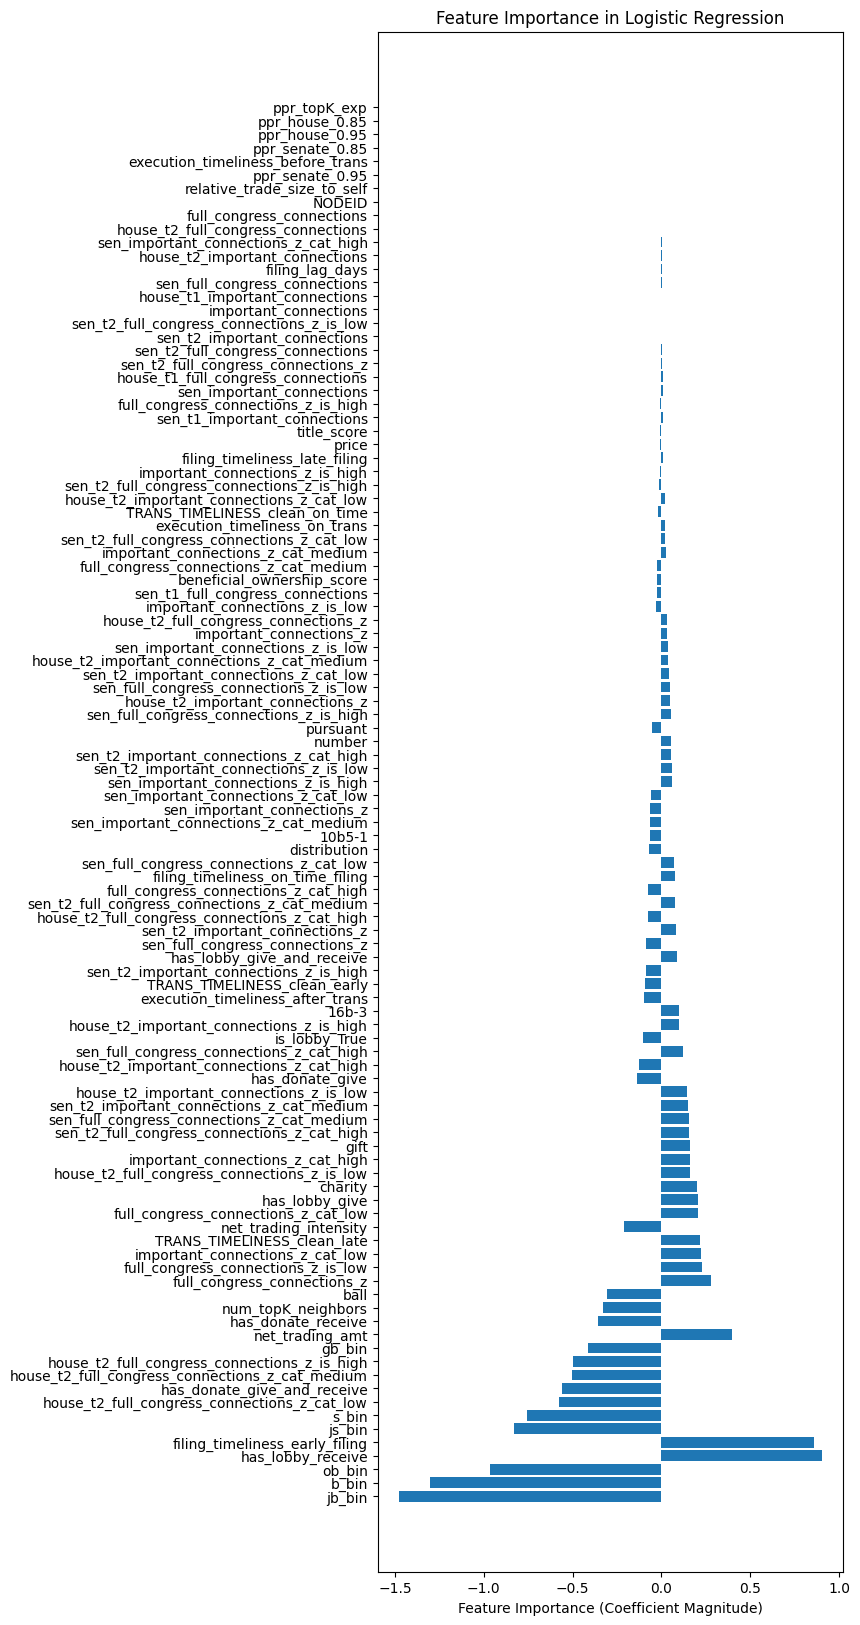

In [86]:
importance = pd.Series(model.coef_[0], index=features.columns).sort_values(key=abs, ascending=False)

# Optional: Plot the importance
plt.figure(figsize=(6,20))
plt.barh(importance.index, importance.values)
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.title("Feature Importance in Logistic Regression")
plt.show()

## Extract top 45 of features based on importance

In [ ]:
top_45 = list(importance.head(45).index)
top_45

['jb_bin',
 'b_bin',
 'ob_bin',
 'has_lobby_receive',
 'filing_timeliness_early_filing',
 'js_bin',
 's_bin',
 'house_t2_full_congress_connections_z_cat_low',
 'has_donate_give_and_receive',
 'house_t2_full_congress_connections_z_cat_medium',
 'house_t2_full_congress_connections_z_is_high',
 'gb_bin',
 'net_trading_amt',
 'has_donate_receive',
 'num_topK_neighbors',
 'ball',
 'full_congress_connections_z',
 'full_congress_connections_z_is_low',
 'important_connections_z_cat_low',
 'TRANS_TIMELINESS_clean_late',
 'net_trading_intensity',
 'full_congress_connections_z_cat_low',
 'has_lobby_give',
 'charity',
 'house_t2_full_congress_connections_z_is_low',
 'important_connections_z_cat_high',
 'gift',
 'sen_t2_full_congress_connections_z_cat_high',
 'sen_full_congress_connections_z_cat_medium',
 'sen_t2_important_connections_z_cat_medium',
 'house_t2_important_connections_z_is_low',
 'has_donate_give',
 'house_t2_important_connections_z_cat_high',
 'sen_full_congress_connections_z_cat_hig

In [ ]:
Xtr_sub_45 = Xtr_sub[top_45]
Xtr_sub_45

,jb_bin,b_bin,ob_bin,has_lobby_receive,filing_timeliness_early_filing,js_bin,s_bin,house_t2_full_congress_connections_z_cat_low,has_donate_give_and_receive,house_t2_full_congress_connections_z_cat_medium,house_t2_full_congress_connections_z_is_high,gb_bin,net_trading_amt,has_donate_receive,num_topK_neighbors,ball,full_congress_connections_z,full_congress_connections_z_is_low,important_connections_z_cat_low,TRANS_TIMELINESS_clean_late,net_trading_intensity,full_congress_connections_z_cat_low,has_lobby_give,charity,house_t2_full_congress_connections_z_is_low,important_connections_z_cat_high,gift,sen_t2_full_congress_connections_z_cat_high,sen_full_congress_connections_z_cat_medium,sen_t2_important_connections_z_cat_medium,house_t2_important_connections_z_is_low,has_donate_give,house_t2_important_connections_z_cat_high,sen_full_congress_connections_z_cat_high,is_lobby_True,house_t2_important_connections_z_is_high,16b-3,execution_timeliness_after_trans,TRANS_TIMELINESS_clean_early,sen_t2_important_connections_z_is_high,has_lobby_give_and_receive,sen_full_congress_connections_z,sen_t2_important_connections_z,house_t2_full_congress_connections_z_cat_high,sen_t2_full_congress_connections_z_cat_medium
0,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.876972,0.0,0,0,-1.0,0,0,0.0,0.0,0,0.0,1,0,0,0.0,0,1,1,0,1.0,0.0,0,0,1.0,0,1.034541,0.636379,1,0
1,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.404706,0.0,0,0,-1.0,0,0,0.0,0.0,0,0.0,1,0,0,0.0,0,1,1,0,1.0,0.0,0,0,1.0,0,0.808893,3.301745,1,0
2,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.342856,0.0,0,0,-1.0,0,0,0.0,0.0,0,0.0,1,1,0,0.0,0,1,0,0,1.0,0.0,0,0,1.0,0,0.742962,4.298150,1,0
3,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.342856,0.0,0,0,-1.0,0,0,0.0,0.0,0,0.0,1,1,0,0.0,0,1,0,0,1.0,0.0,0,0,1.0,0,0.742962,4.298150,1,0
4,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.423546,0.0,0,0,-1.0,0,0,0.0,0.0,1,0.0,1,1,0,0.0,0,1,0,0,1.0,0.0,0,0,1.0,0,0.778610,2.244395,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417891,1,0,0,0,0,0,0,1,0,0,0.0,0,1.0,0,0.0,0.0,0.730955,0.0,1,0,1.0,0,0,0.0,1.0,0,0.0,0,1,1,0.0,0,0,0,0,0.0,0.0,0,0,0.0,0,0.515049,-0.182574,0,0
1417892,1,0,0,0,0,0,0,0,0,1,0.0,0,1.0,0,0.0,0.0,0.920338,0.0,1,0,1.0,0,0,0.0,0.0,0,0.0,0,0,0,1.0,0,0,1,0,0.0,0.0,0,0,0.0,0,0.845844,-0.352806,0,1
1417893,0,1,0,0,0,0,0,0,0,1,0.0,0,1.0,0,0.0,0.0,0.969172,0.0,1,0,1.0,0,0,0.0,0.0,0,0.0,0,0,0,1.0,1,0,1,0,0.0,0.0,0,0,0.0,0,1.022408,-0.643255,0,1
1417894,0,1,0,0,0,0,0,1,0,0,0.0,0,1.0,0,0.0,0.0,0.867330,0.0,1,0,1.0,0,0,0.0,1.0,0,0.0,0,0,0,1.0,0,0,1,0,0.0,0.0,0,0,0.0,0,0.887755,-0.442935,0,0


### Find model p-values when fit in logistic regression

In [89]:
def find_significance(Xdata, y):
    model = sm.Logit(y, Xdata).fit()
    return model

In [ ]:
model1 = find_significance(Xtr_sub_45, ytr)
model1.summary()

Optimization terminated successfully.
         Current function value: 0.614013
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 y_pred   No. Observations:              1417896
Model:                          Logit   Df Residuals:                  1417851
Method:                           MLE   Df Model:                           44
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                 0.02212
Time:                        14:46:13   Log-Likelihood:            -8.7061e+05
converged:                       True   LL-Null:                   -8.9030e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
jb_bin                                             -1.5324      0.013   -116.281      0.000      -1.558      -1.507
b_bin                                              -1.3276      0.012   -111.382      0.000      -1.351      -1.304
ob_bin                                             -1.0238      0.026    -38.820      0.000      -1.075      -0.972
has_lobby_receive                                   0.9938      0.104      9.512      0.000       0.789       1.199
filing_timeliness_early_filing                      0.7763      0.107      7.256      0.000       0.567       0.986
js_bin                                             -0.8999      0.015    -59.787      0.000      -0.929      -0.870
s_bin                                              -0.8368      0.010    -86.592      0.000      -0.856      -0.818
house_t2_full_congress_connections_z_cat_low       -0.0160        nan        nan        nan         nan         nan
has_donate_give_and_receive                        -0.5723      0.017    -33.376      0.000      -0.606      -0.539
house_t2_full_congress_connections_z_cat_medium    -0.1298      0.026     -5.010      0.000      -0.181      -0.079
house_t2_full_congress_connections_z_is_high       -0.0560      4.021     -0.014      0.989      -7.938       7.826
gb_bin                                             -0.4047      0.018    -22.157      0.000      -0.441      -0.369
net_trading_amt                                     0.3946      0.009     42.678      0.000       0.376       0.413
has_donate_receive                                 -0.3748      0.023    -16.587      0.000      -0.419      -0.330
num_topK_neighbors                                 -0.3031      0.031     -9.748      0.000      -0.364      -0.242
ball                                               -0.3327      0.018    -18.604      0.000      -0.368      -0.298
full_congress_connections_z                         0.2328      0.020     11.756      0.000       0.194       0.272
full_congress_connections_z_is_low                  0.2115    2.6e+14   8.12e-16      1.000    -5.1e+14     5.1e+14
important_connections_z_cat_low                     0.1079      0.004     24.641      0.000       0.099       0.117
TRANS_TIMELINESS_clean_late                         0.4419      0.037     12.070      0.000       0.370       0.514
net_trading_intensity                              -0.2107      0.010    -22.125      0.000      -0.229      -0.192
full_congress_connections_z_cat_low                 0.2115    2.6e+14   8.12e-16      1.000    -5.1e+14     5.1e+14
has_lobby_give                                      0.2375      0.016     15.056      0.000       0.207       0.268
charity                                             0.1783      0.059      3.038      0.002       0.063       0.293
house_t2_full_congress_connections_z_is_low        -0.0160   1.06e+05  -1.51e-07      1.000   -2.08e+05    2.

### Remove insignificant features with p-values > 0.05 each iteration by iteration

In [ ]:
def remove_insignificance(X, y):
    to_remove = []
    
    ## Checks if a p-value is removed each iteration
    is_change = True
    while is_change:
        is_change = False
        curr_data = X.drop(columns=to_remove)
        model = find_significance(curr_data, y)
        
        ## Finds p-value > 0.05
        p_val = model.pvalues.sort_values(ascending=False)
        if p_val[0] > 0.05:
            to_remove.append(p_val.index[0])
            
            ## Removes p-value
            print(f"=== remove {p_val.index[0]} with p-value {p_val[0]}")
            is_change = True
    return to_remove
            

In [ ]:
remove_2 = remove_insignificance(Xtr_sub_45, ytr)

Optimization terminated successfully.
         Current function value: 0.614013
         Iterations 7
=== remove full_congress_connections_z_cat_low with p-value 0.9999999999999993
Optimization terminated successfully.
         Current function value: 0.614013
         Iterations 7
=== remove has_lobby_give_and_receive with p-value 0.08465335873306276
Optimization terminated successfully.
         Current function value: 0.614014
         Iterations 7
=== remove house_t2_important_connections_z_cat_high with p-value 1.0
Optimization terminated successfully.
         Current function value: 0.614014
         Iterations 7
=== remove house_t2_full_congress_connections_z_cat_high with p-value 0.9999999941581563
Optimization terminated successfully.
         Current function value: 0.614014
         Iterations 7
=== remove house_t2_important_connections_z_is_high with p-value 0.9417819245406986
Optimization terminated successfully.
         Current function value: 0.614014
         Iteratio

In [ ]:
remove_log = Xtr_sub_45.drop(columns=remove_2)
remove_log

,jb_bin,b_bin,ob_bin,has_lobby_receive,filing_timeliness_early_filing,js_bin,s_bin,house_t2_full_congress_connections_z_cat_low,has_donate_give_and_receive,house_t2_full_congress_connections_z_cat_medium,house_t2_full_congress_connections_z_is_high,gb_bin,net_trading_amt,has_donate_receive,num_topK_neighbors,ball,full_congress_connections_z,full_congress_connections_z_is_low,important_connections_z_cat_low,TRANS_TIMELINESS_clean_late,net_trading_intensity,has_lobby_give,charity,house_t2_full_congress_connections_z_is_low,important_connections_z_cat_high,gift,sen_t2_full_congress_connections_z_cat_high,sen_full_congress_connections_z_cat_medium,sen_t2_important_connections_z_cat_medium,house_t2_important_connections_z_is_low,has_donate_give,sen_full_congress_connections_z_cat_high,is_lobby_True,16b-3,execution_timeliness_after_trans,TRANS_TIMELINESS_clean_early,sen_t2_important_connections_z_is_high,sen_full_congress_connections_z,sen_t2_important_connections_z,sen_t2_full_congress_connections_z_cat_medium
0,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.876972,0.0,0,0,-1.0,0,0.0,0.0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0,1.0,1.034541,0.636379,0
1,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.404706,0.0,0,0,-1.0,0,0.0,0.0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0,1.0,0.808893,3.301745,0
2,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.342856,0.0,0,0,-1.0,0,0.0,0.0,0,0.0,1,1,0,0.0,0,0,0,0.0,0,0,1.0,0.742962,4.298150,0
3,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.342856,0.0,0,0,-1.0,0,0.0,0.0,0,0.0,1,1,0,0.0,0,0,0,0.0,0,0,1.0,0.742962,4.298150,0
4,0,0,0,0,0,0,1,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.423546,0.0,0,0,-1.0,0,0.0,0.0,1,0.0,1,1,0,0.0,0,0,0,0.0,0,0,1.0,0.778610,2.244395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417891,1,0,0,0,0,0,0,1,0,0,0.0,0,1.0,0,0.0,0.0,0.730955,0.0,1,0,1.0,0,0.0,1.0,0,0.0,0,1,1,0.0,0,0,0,0.0,0,0,0.0,0.515049,-0.182574,0
1417892,1,0,0,0,0,0,0,0,0,1,0.0,0,1.0,0,0.0,0.0,0.920338,0.0,1,0,1.0,0,0.0,0.0,0,0.0,0,0,0,1.0,0,1,0,0.0,0,0,0.0,0.845844,-0.352806,1
1417893,0,1,0,0,0,0,0,0,0,1,0.0,0,1.0,0,0.0,0.0,0.969172,0.0,1,0,1.0,0,0.0,0.0,0,0.0,0,0,0,1.0,1,1,0,0.0,0,0,0.0,1.022408,-0.643255,1
1417894,0,1,0,0,0,0,0,1,0,0,0.0,0,1.0,0,0.0,0.0,0.867330,0.0,1,0,1.0,0,0.0,1.0,0,0.0,0,0,0,1.0,0,1,0,0.0,0,0,0.0,0.887755,-0.442935,0


### Remove collinear columns after each iteration by removing the largest one. Stops until VIF is < 10

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

## Creates VIF data to see multicollinearity
def vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                    for i in range(data.shape[1])]
    vif_data = vif_data.sort_values(by=["VIF"], ascending=False).reset_index(drop=True)
    return vif_data

### Seen through VIF some are highly collinear

In [ ]:
vif_data = vif(remove_log)
vif_data

,feature,VIF
0,house_t2_full_congress_connections_z_is_low,inf
1,house_t2_full_congress_connections_z_cat_low,inf
2,net_trading_intensity,25.736283
3,net_trading_amt,22.053002
4,s_bin,18.662845
5,sen_full_congress_connections_z_cat_medium,17.371136
6,full_congress_connections_z,14.634504
7,full_congress_connections_z_is_low,14.200703
8,sen_full_congress_connections_z,13.128105
9,house_t2_full_congress_connections_z_is_high,10.952360


### Similar approach to above removing high vif > 10 by removing iteratively

In [ ]:
def remove_vif(data):
    to_remove = []
    
    ## Updates if feature is removed
    is_change = True
    while is_change:
        is_change = False
        curr_vif = vif(data.drop(columns=to_remove))
        
        ## Remove feature if VIF of the highest  > 10
        if curr_vif["VIF"].iloc[0] > 10:
            to_remove.append(curr_vif['feature'].iloc[0])
            print(f"=== Remove {curr_vif['feature'].iloc[0]} with vif {curr_vif['VIF'].iloc[0]}")
            is_change = True
    return to_remove
    

In [98]:
remove_vif_data = remove_vif(remove_log)
remove_vif_data

=== Remove house_t2_full_congress_connections_z_is_low with vif inf
=== Remove house_t2_full_congress_connections_z_cat_low with vif 41.054646384574916
=== Remove net_trading_intensity with vif 25.29487577627506
=== Remove s_bin with vif 16.76541975503343
=== Remove full_congress_connections_z with vif 13.204091840646823


['house_t2_full_congress_connections_z_is_low',
 'house_t2_full_congress_connections_z_cat_low',
 'net_trading_intensity',
 's_bin',
 'full_congress_connections_z']

### Removing high VIF leaving with 35 features

In [99]:
remove_vif = remove_log.drop(columns=remove_vif_data)
remove_vif

,jb_bin,b_bin,ob_bin,has_lobby_receive,filing_timeliness_early_filing,js_bin,has_donate_give_and_receive,house_t2_full_congress_connections_z_cat_medium,house_t2_full_congress_connections_z_is_high,gb_bin,net_trading_amt,has_donate_receive,num_topK_neighbors,ball,full_congress_connections_z_is_low,important_connections_z_cat_low,TRANS_TIMELINESS_clean_late,has_lobby_give,charity,important_connections_z_cat_high,gift,sen_t2_full_congress_connections_z_cat_high,sen_full_congress_connections_z_cat_medium,sen_t2_important_connections_z_cat_medium,house_t2_important_connections_z_is_low,has_donate_give,sen_full_congress_connections_z_cat_high,is_lobby_True,16b-3,execution_timeliness_after_trans,TRANS_TIMELINESS_clean_early,sen_t2_important_connections_z_is_high,sen_full_congress_connections_z,sen_t2_important_connections_z,sen_t2_full_congress_connections_z_cat_medium
0,0,0,0,0,0,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0,1.0,1.034541,0.636379,0
1,0,0,0,0,0,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,1,0,0,0.0,0,1,0,0.0,0,0,1.0,0.808893,3.301745,0
2,0,0,0,0,0,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,1,1,0,0.0,0,0,0,0.0,0,0,1.0,0.742962,4.298150,0
3,0,0,0,0,0,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,1,1,0,0.0,0,0,0,0.0,0,0,1.0,0.742962,4.298150,0
4,0,0,0,0,0,0,0,0,1.0,0,-1.0,0,0.0,0.0,0.0,0,0,0,0.0,1,0.0,1,1,0,0.0,0,0,0,0.0,0,0,1.0,0.778610,2.244395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417891,1,0,0,0,0,0,0,0,0.0,0,1.0,0,0.0,0.0,0.0,1,0,0,0.0,0,0.0,0,1,1,0.0,0,0,0,0.0,0,0,0.0,0.515049,-0.182574,0
1417892,1,0,0,0,0,0,0,1,0.0,0,1.0,0,0.0,0.0,0.0,1,0,0,0.0,0,0.0,0,0,0,1.0,0,1,0,0.0,0,0,0.0,0.845844,-0.352806,1
1417893,0,1,0,0,0,0,0,1,0.0,0,1.0,0,0.0,0.0,0.0,1,0,0,0.0,0,0.0,0,0,0,1.0,1,1,0,0.0,0,0,0.0,1.022408,-0.643255,1
1417894,0,1,0,0,0,0,0,0,0.0,0,1.0,0,0.0,0.0,0.0,1,0,0,0.0,0,0.0,0,0,0,1.0,0,1,0,0.0,0,0,0.0,0.887755,-0.442935,0


In [100]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(remove_vif, ytr)

LogisticRegression(penalty='l1', solver='liblinear')

## Feature importance with newest kept data

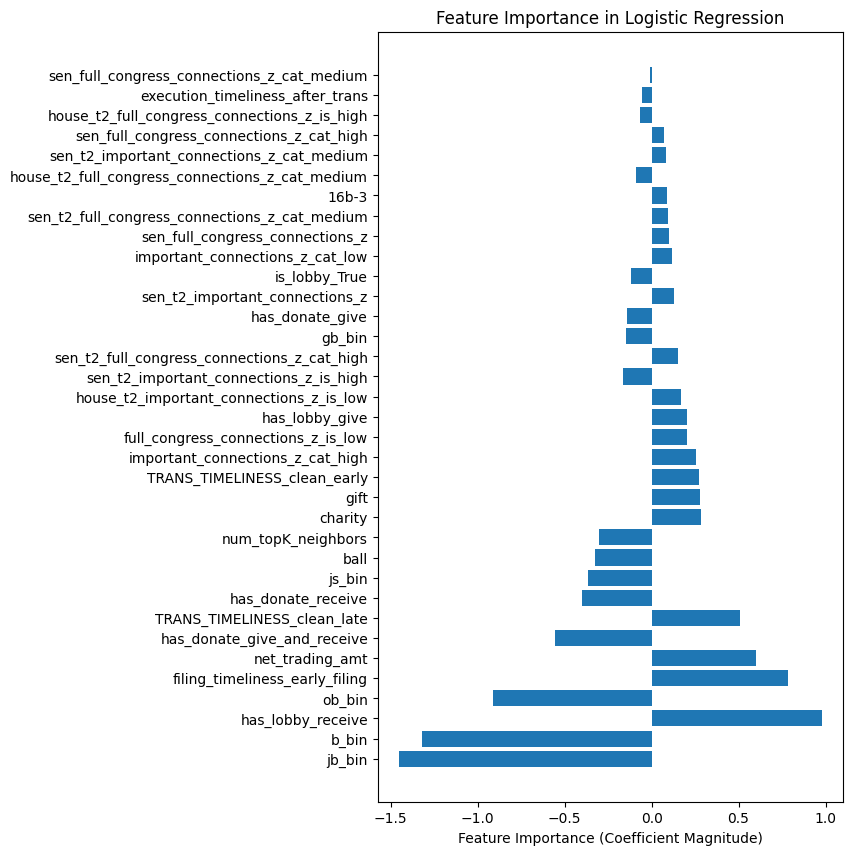

In [101]:
importance = pd.Series(model.coef_[0], index=remove_vif.columns).sort_values(key=abs, ascending=False)

# Optional: Plot the importance
plt.figure(figsize=(6,10))
plt.barh(importance.index, importance.values)
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.title("Feature Importance in Logistic Regression")
plt.show()

## Feature importance with Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assume X is your features and y is your target
model = RandomForestClassifier(random_state=4263)
model.fit(remove_vif, ytr)

RandomForestClassifier(random_state=4263)

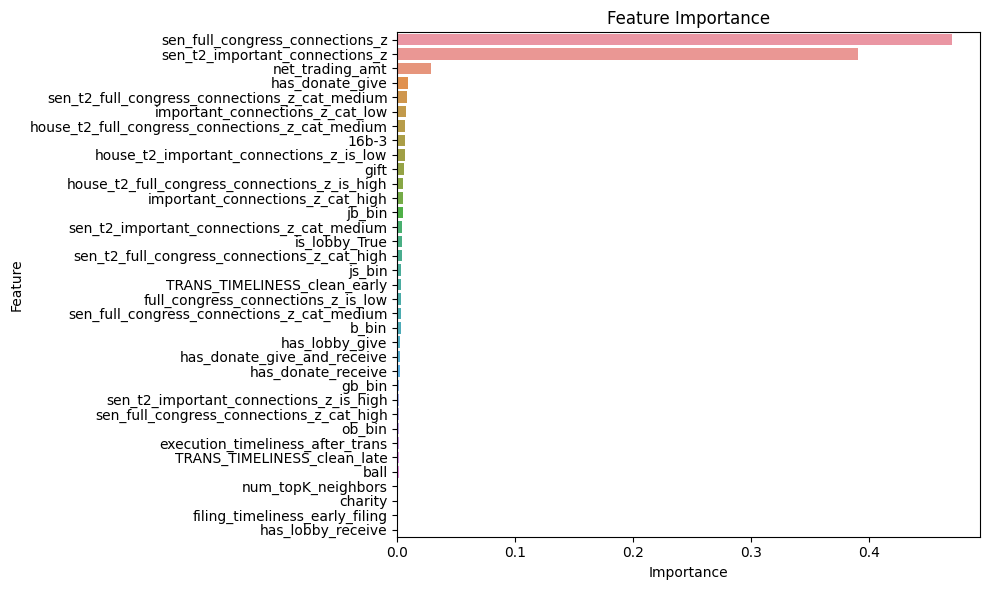

In [103]:
importances = model.feature_importances_
features_curr = remove_vif.columns
importance_df = pd.DataFrame({'Feature': features_curr, 'Importance': importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(importance_df, y="Feature", x="Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

## Correlation graph

In [104]:
def get_corr_graph(X):
    corr = X.corr(method="pearson")
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature-Label Correlation Heatmap")
    plt.show()

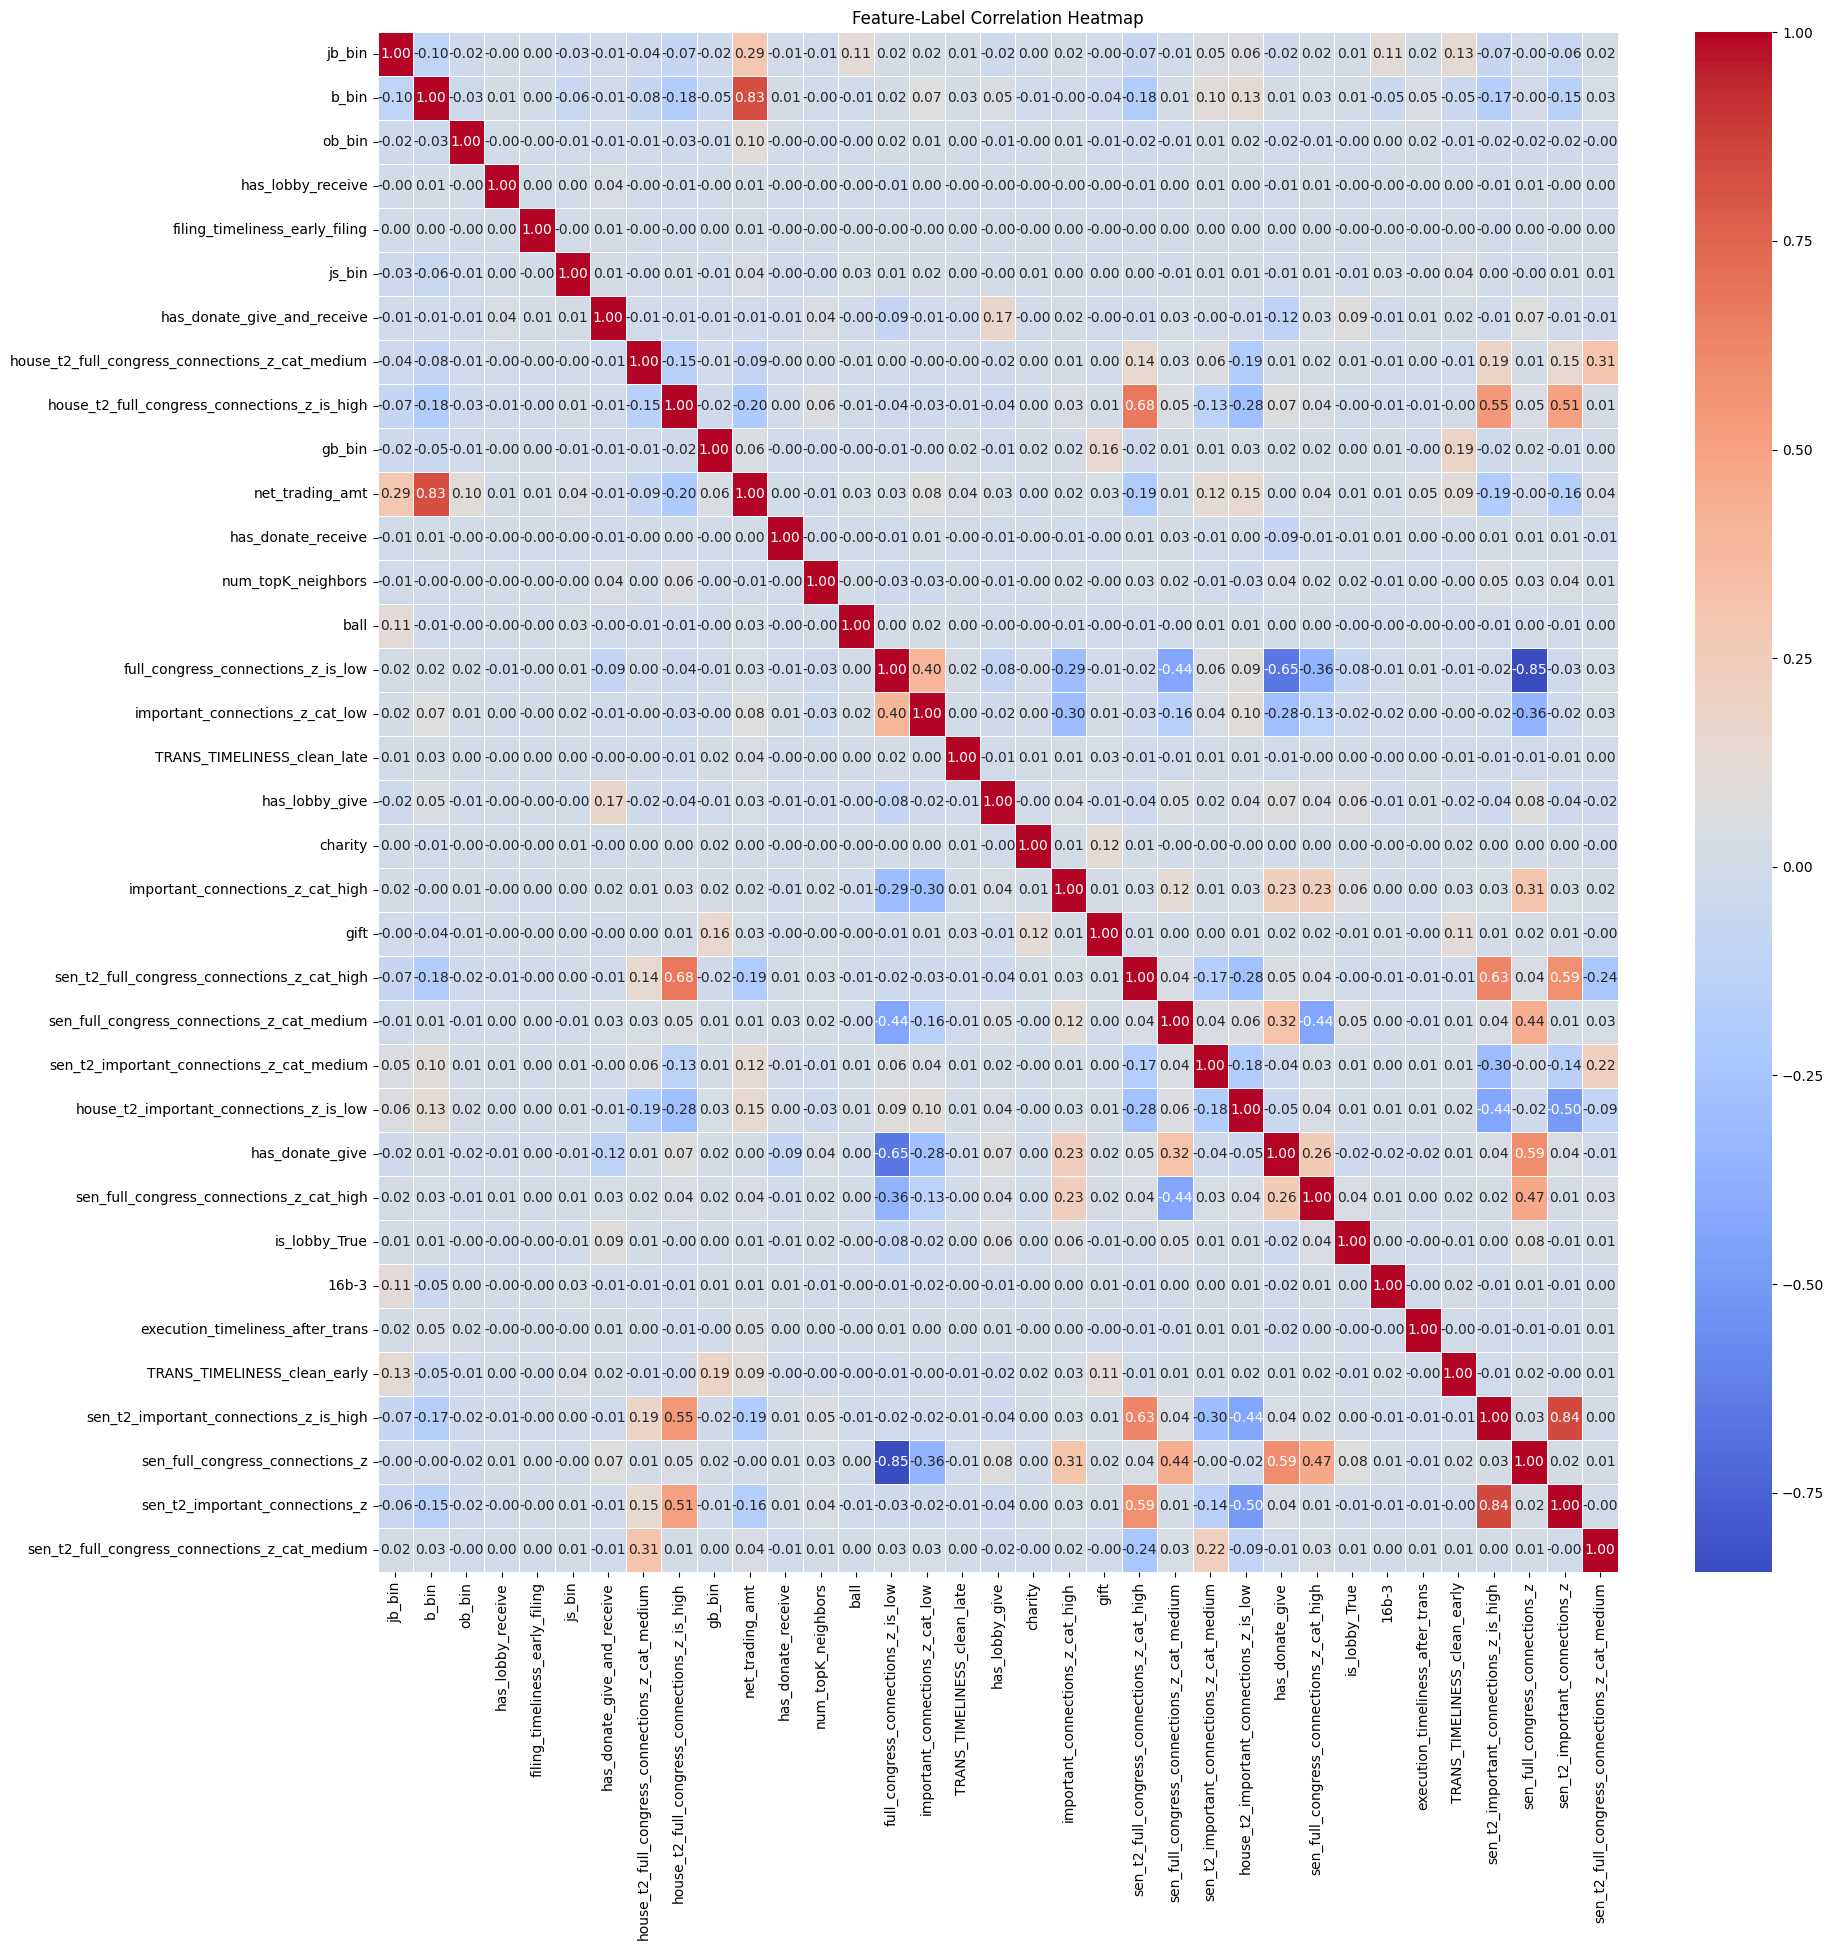

In [105]:
get_corr_graph(remove_vif)

## Training and test

### See below for best features kept

In [106]:
features_to_keep = remove_vif.columns
features_to_keep

Index(['jb_bin', 'b_bin', 'ob_bin', 'has_lobby_receive',
       'filing_timeliness_early_filing', 'js_bin',
       'has_donate_give_and_receive',
       'house_t2_full_congress_connections_z_cat_medium',
       'house_t2_full_congress_connections_z_is_high', 'gb_bin',
       'net_trading_amt', 'has_donate_receive', 'num_topK_neighbors', 'ball',
       'full_congress_connections_z_is_low', 'important_connections_z_cat_low',
       'TRANS_TIMELINESS_clean_late', 'has_lobby_give', 'charity',
       'important_connections_z_cat_high', 'gift',
       'sen_t2_full_congress_connections_z_cat_high',
       'sen_full_congress_connections_z_cat_medium',
       'sen_t2_important_connections_z_cat_medium',
       'house_t2_important_connections_z_is_low', 'has_donate_give',
       'sen_full_congress_connections_z_cat_high', 'is_lobby_True', '16b-3',
       'execution_timeliness_after_trans', 'TRANS_TIMELINESS_clean_early',
       'sen_t2_important_connections_z_is_high',
       'sen_full_congress_

In [107]:
TESTING_FULL_FEATURES = folder_location.TESTING_FULL_FEATURES_FILE
test = pd.read_csv(f'{PROCESSED_FOLDER}/{TESTING_FULL_FEATURES}')

In [108]:
testx, testy = test[features_to_keep], test['y_pred']

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=4263)

trainx, trainy = data[features_to_keep], data['y_pred']

# Train the model
rf.fit(trainx, trainy)

# Predict on test set
y_pred = rf.predict(testx)

# Evaluate performance
print("Accuracy:", accuracy_score(testy, y_pred))
print("Classification Report:\n", classification_report(testy, y_pred))

Accuracy: 0.5504091983170999
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63    213483
           1       0.42      0.42      0.42    133537

    accuracy                           0.55    347020
   macro avg       0.53      0.53      0.53    347020
weighted avg       0.55      0.55      0.55    347020



### Result of training on kept features

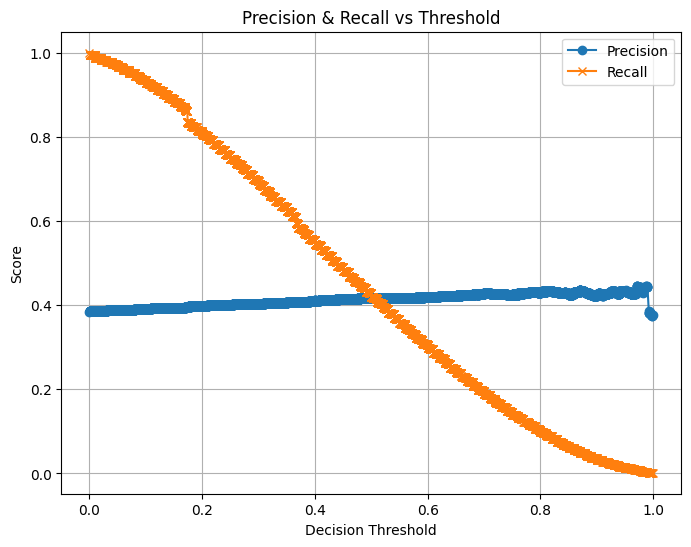

In [110]:
from sklearn.metrics        import recall_score, classification_report, precision_recall_curve
probs = rf.predict_proba(testx)[:,1]
precision_vals, recall_vals, thresholds = precision_recall_curve(testy, probs, pos_label=1)
    
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision_vals[:-1], label="Precision", marker="o")
plt.plot(thresholds, recall_vals[:-1],    label="Recall",    marker="x")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title(f"Precision & Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

compute pr_auc 0.41196890520649554 0.41136110001286413
compute roc_auc 0.5382517202808603


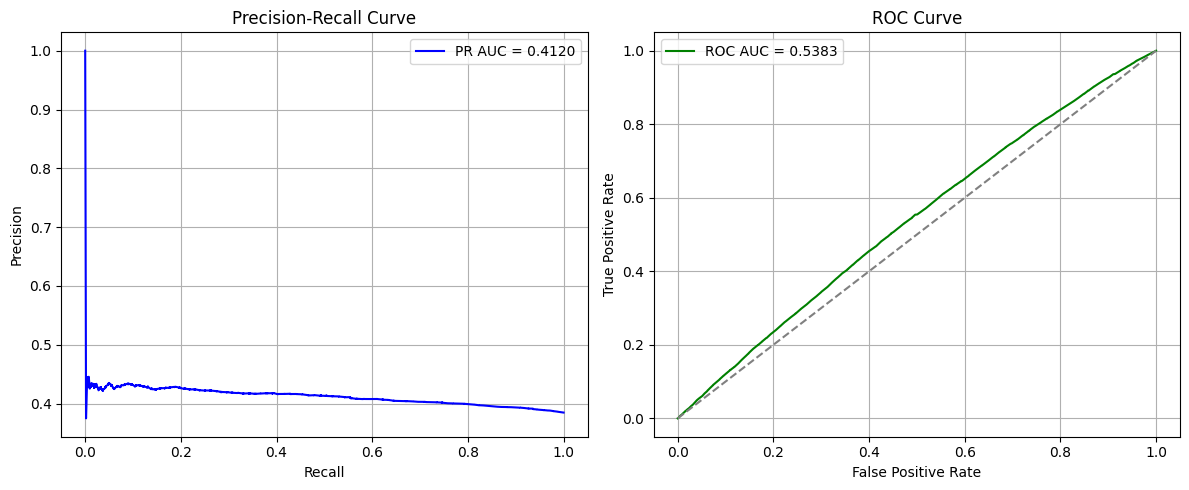

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, roc_curve, roc_auc_score

y_probs = rf.predict_proba(testx)[:, 1]
# Compute precision-recall pairs
precision, recall, pr_thresholds = precision_recall_curve(testy, y_probs)
pr_auc = auc(recall, precision)
avg_precision = average_precision_score(testy, y_probs)
print("compute pr_auc", pr_auc, avg_precision)

# Compute ROC curve
fpr, tpr, roc_thresholds = roc_curve(testy, y_probs)
roc_auc = roc_auc_score(testy, y_probs)
print("compute roc_auc", roc_auc)

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot Precision-Recall curve
axs[0].plot(recall, precision, color='blue', label=f"PR AUC = {pr_auc:.4f}")
axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].set_title("Precision-Recall Curve")
axs[0].grid(True)
axs[0].legend()

# Plot ROC curve
axs[1].plot(fpr, tpr, color='green', label=f"ROC AUC = {roc_auc:.4f}")
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_title("ROC Curve")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()